In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import gensim.downloader as api


In [9]:
# Load dataset yang sudah dibersihkan dan diberi label
df = pd.read_csv("../data/processed/gojek_cleaned_labeled.csv")

# Pisahkan fitur dan label
X = df["clean_text"]
y = df["sentiment"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [18]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["negative", "neutral", "positive"])
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=["Negative", "Neutral", "Positive"],
                yticklabels=["Negative", "Neutral", "Positive"])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


# Naive Bayes + TF-IDF

🔹 Naive Bayes + TF-IDF
              precision    recall  f1-score   support

    negative       1.00      0.09      0.17        11
     neutral       0.53      1.00      0.69        28
    positive       1.00      0.17      0.29        18

    accuracy                           0.56        57
   macro avg       0.84      0.42      0.38        57
weighted avg       0.77      0.56      0.46        57



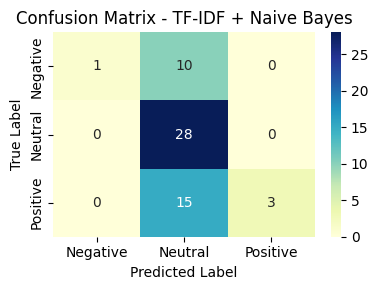

In [19]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)

print("🔹 Naive Bayes + TF-IDF")
print(classification_report(y_test, y_pred_tfidf))

plot_conf_matrix(y_test, y_pred_tfidf, "TF-IDF + Naive Bayes")

# Naive Bayes + Bags-of-Words

🔹 Naive Bayes + BoW
              precision    recall  f1-score   support

    negative       0.60      0.27      0.38        11
     neutral       0.83      0.71      0.77        28
    positive       0.61      0.94      0.74        18

    accuracy                           0.70        57
   macro avg       0.68      0.64      0.63        57
weighted avg       0.72      0.70      0.68        57



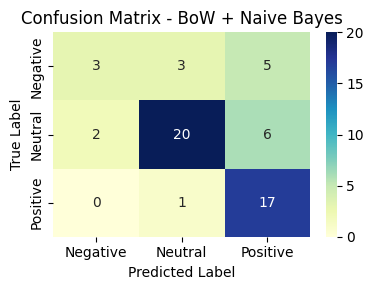

In [20]:
vectorizer_bow = CountVectorizer(ngram_range=(1,1), max_features=5000)
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

print("🔹 Naive Bayes + BoW")
print(classification_report(y_test, y_pred_bow))

plot_conf_matrix(y_test, y_pred_bow, "BoW + Naive Bayes")


# Naive Bayes + Word2Vec

100%|██████████| 57/57 [00:00<00:00, 18995.34it/s]


🔹 Naive Bayes + Word2Vec
              precision    recall  f1-score   support

    negative       0.33      0.73      0.46        11
     neutral       0.71      0.54      0.61        28
    positive       0.50      0.33      0.40        18

    accuracy                           0.51        57
   macro avg       0.52      0.53      0.49        57
weighted avg       0.57      0.51      0.52        57



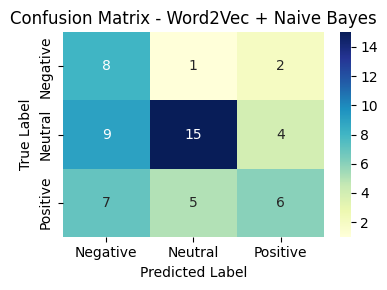

In [21]:
# Load pretrained Word2Vec (gunakan vector kecil agar cepat)
word2vec = api.load("glove-wiki-gigaword-100")  # Bisa ganti ke "word2vec-google-news-300" jika kuat

def get_average_word2vec(tokens, model, k=100):
    vec = np.zeros(k)
    count = 0
    for word in tokens.split():
        if word in model:
            vec += model[word]
            count += 1
    return vec / count if count > 0 else vec

# Transform ke vektor
X_train_w2v = np.vstack([get_average_word2vec(text, word2vec, 100) for text in tqdm(X_train)])
X_test_w2v = np.vstack([get_average_word2vec(text, word2vec, 100) for text in tqdm(X_test)])

from sklearn.naive_bayes import GaussianNB
model_w2v = GaussianNB()
model_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = model_w2v.predict(X_test_w2v)

print("🔹 Naive Bayes + Word2Vec")
print(classification_report(y_test, y_pred_w2v))

plot_conf_matrix(y_test, y_pred_w2v, "Word2Vec + Naive Bayes")


# Naive Bayes + TF-IDF + Feature Selection (Chi2)

🔹 Naive Bayes + TF-IDF + Chi2
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        11
     neutral       0.51      1.00      0.67        28
    positive       1.00      0.11      0.20        18

    accuracy                           0.53        57
   macro avg       0.50      0.37      0.29        57
weighted avg       0.57      0.53      0.39        57



c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

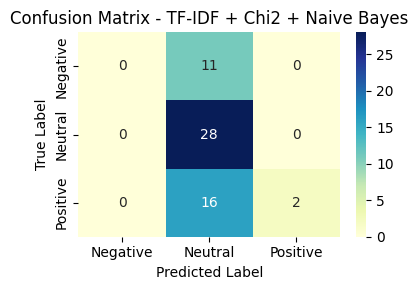

In [22]:
# TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Feature Selection (Chi-squared)
selector = SelectKBest(score_func=chi2, k=1000)
X_train_chi = selector.fit_transform(X_train_tfidf, y_train)
X_test_chi = selector.transform(X_test_tfidf)

# Modeling
model_chi = MultinomialNB()
model_chi.fit(X_train_chi, y_train)
y_pred_chi = model_chi.predict(X_test_chi)

print("🔹 Naive Bayes + TF-IDF + Chi2")
print(classification_report(y_test, y_pred_chi))

plot_conf_matrix(y_test, y_pred_chi, "TF-IDF + Chi2 + Naive Bayes")


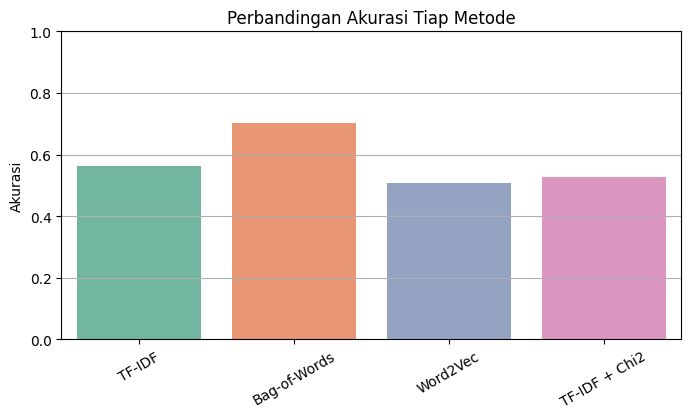

In [23]:
from sklearn.metrics import accuracy_score

scores = {
    "TF-IDF": accuracy_score(y_test, y_pred_tfidf),
    "Bag-of-Words": accuracy_score(y_test, y_pred_bow),
    "Word2Vec": accuracy_score(y_test, y_pred_w2v),
    "TF-IDF + Chi2": accuracy_score(y_test, y_pred_chi),
}

plt.figure(figsize=(8, 4))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette="Set2")
plt.ylim(0,1)
plt.title("Perbandingan Akurasi Tiap Metode")
plt.ylabel("Akurasi")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()
